# Loading Data

In [8]:
import pandas as pd

df_btc = pd.read_csv('btc_data.csv')
df_btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/15/2023,"26,901.9","26,852.8","26,920.6","26,816.9",10.46K,0.18%
1,10/14/2023,"26,852.8","26,863.5","26,975.7","26,805.1",13.56K,-0.04%
2,10/13/2023,"26,863.5","26,761.1","27,114.8","26,682.9",33.66K,0.38%
3,10/12/2023,"26,761.1","26,878.2","26,942.8","26,565.3",32.75K,-0.43%
4,10/11/2023,"26,876.6","27,391.9","27,475.9","26,558.4",55.78K,-1.88%


In [9]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4293 non-null   object
 1   Price     4293 non-null   object
 2   Open      4293 non-null   object
 3   High      4293 non-null   object
 4   Low       4293 non-null   object
 5   Vol.      4293 non-null   object
 6   Change %  4293 non-null   object
dtypes: object(7)
memory usage: 234.9+ KB


# Converting Data Types

In [12]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'], format='%m/%d/%Y')
df_btc['Price'] = df_btc['Price'].str.replace(',', '', regex=True).astype(float)
df_btc['Open'] = df_btc['Open'].str.replace(',', '', regex=True).astype(float)
df_btc['High'] = df_btc['High'].str.replace(',', '', regex=True).astype(float)
df_btc['Low'] = df_btc['Low'].str.replace(',', '', regex=True).astype(float)
df_btc['Vol.'] = df_btc['Vol.'].str.extract('(\d+\.\d+)').astype(float)
df_btc['Change %'] = df_btc['Change %'].str.rstrip('%').astype(float)


In [13]:
df_btc.info()
df_btc.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4293 non-null   datetime64[ns]
 1   Price     4293 non-null   float64       
 2   Open      4293 non-null   float64       
 3   High      4293 non-null   float64       
 4   Low       4293 non-null   float64       
 5   Vol.      4293 non-null   float64       
 6   Change %  4293 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 234.9 KB


,Date,Price,Open,High,Low,Vol.,Change %
0,2023-10-15,26901.9,26852.8,26920.6,26816.9,10.46,0.18
1,2023-10-14,26852.8,26863.5,26975.7,26805.1,13.56,-0.04
2,2023-10-13,26863.5,26761.1,27114.8,26682.9,33.66,0.38
3,2023-10-12,26761.1,26878.2,26942.8,26565.3,32.75,-0.43
4,2023-10-11,26876.6,27391.9,27475.9,26558.4,55.78,-1.88


In [14]:
df_btc.describe()


,Date,Price,Open,High,Low,Vol.,Change %
count,4293,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,2017-11-28 23:59:59.999999744,10886.777685,10880.596809,11154.212322,10578.387258,154.319334,0.351556
min,2012-01-14 00:00:00,4.200000,4.200000,4.400000,3.900000,0.260000,-57.210000
25%,2014-12-22 00:00:00,372.200000,371.600000,381.400000,361.500000,31.310000,-1.250000
50%,2017-11-29 00:00:00,3944.300000,3942.800000,4028.000000,3847.900000,69.580000,0.090000
75%,2020-11-06 00:00:00,16286.800000,16278.600000,16621.900000,15669.900000,173.910000,1.850000
max,2023-10-15 00:00:00,67527.900000,67528.700000,68990.600000,66334.900000,999.530000,336.840000
std,NaN,15165.433181,15164.487223,15548.708929,14730.388848,204.415482,7.072240


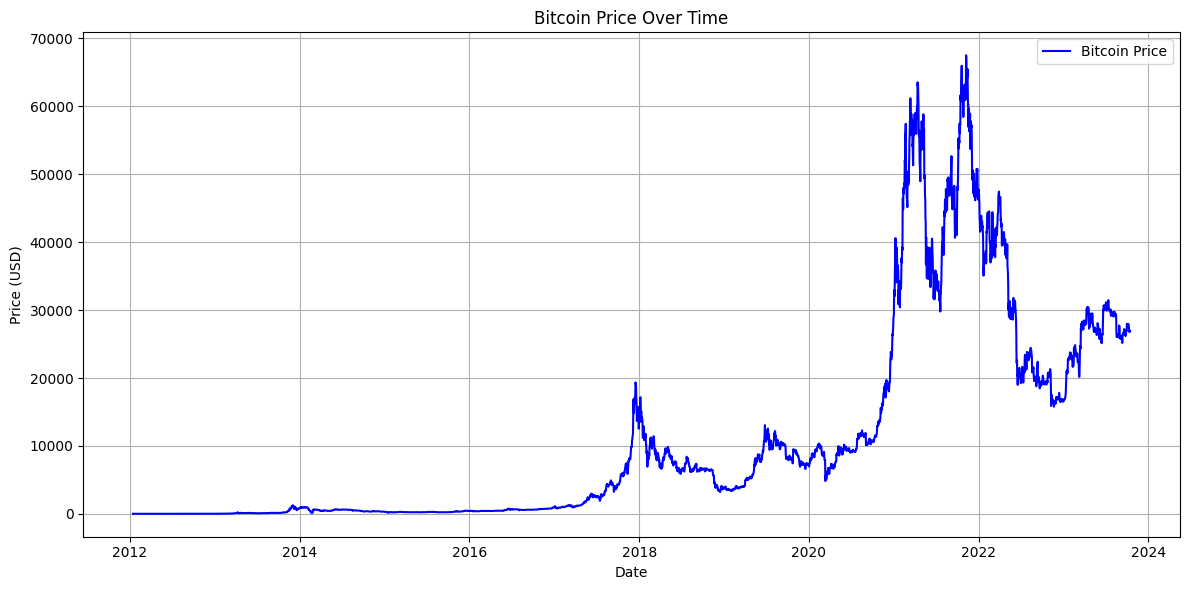

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_btc['Date'], df_btc['Price'], label='Bitcoin Price', color='b')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


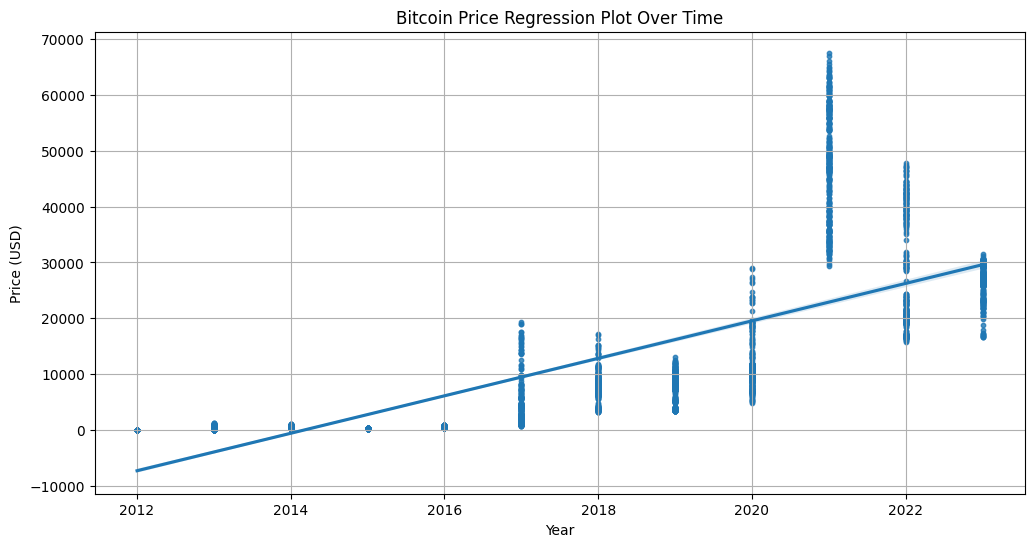

In [18]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df_btc['Date'].dt.year, y=df_btc['Price'], scatter_kws={'s': 10})
plt.title('Bitcoin Price Regression Plot Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.show()


In [19]:
import pandas as pd

df_btc['Year'] = df_btc['Date'].dt.year
df_btc['Month'] = df_btc['Date'].dt.month
monthly_avg_prices = df_btc.groupby(['Year', 'Month'])['Price'].mean().reset_index()

overall_avg_price = df_btc['Price'].mean()
above_average_months = monthly_avg_prices[monthly_avg_prices['Price'] > overall_avg_price]

print("Months with average prices consistently above overall average:")
print(above_average_months)


Months with average prices consistently above overall average:
     Year  Month         Price
71   2017     12  15034.532258
72   2018      1  13003.535484
103  2020      8  11638.406452
105  2020     10  11888.358065
106  2020     11  16660.766667
107  2020     12  21982.048387
108  2021      1  34745.083871
109  2021      2  46295.660714
110  2021      3  54863.816129
111  2021      4  57070.046667
112  2021      5  46435.112903
113  2021      6  35822.630000
114  2021      7  34424.267742
115  2021      8  45686.306452
116  2021      9  45922.900000
117  2021     10  57897.616129
118  2021     11  60679.753333
119  2021     12  49296.770968
120  2022      1  41093.712903
121  2022      2  40739.460714
122  2022      3  41957.051613
123  2022      4  41408.300000
124  2022      5  31695.303226
125  2022      6  24378.823333
126  2022      7  21532.929032
127  2022      8  22353.016129
128  2022      9  19794.286667
129  2022     10  19647.096774
130  2022     11  17591.980000
131  20

# Pie chart of BTC monthly price dominance

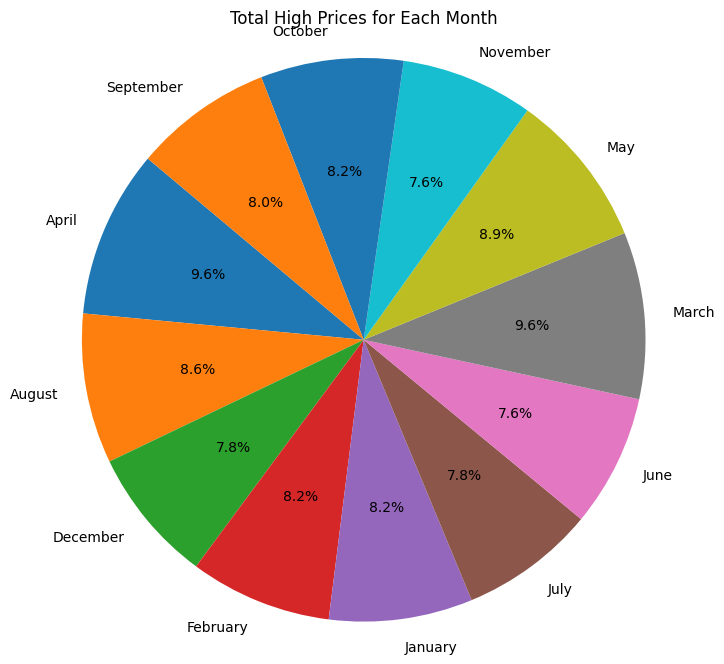

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned the data
# If not, refer to the previous messages for data cleaning steps

# Group the data by month and calculate the sum of high prices for each month
monthly_high_prices = df_btc.groupby(df_btc['Date'].dt.strftime('%B'))['High'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthly_high_prices, labels=monthly_high_prices.index, autopct='%1.1f%%', startangle=140)
plt.title('Total High Prices for Each Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


# Plotting the BTC halfing lines datewise

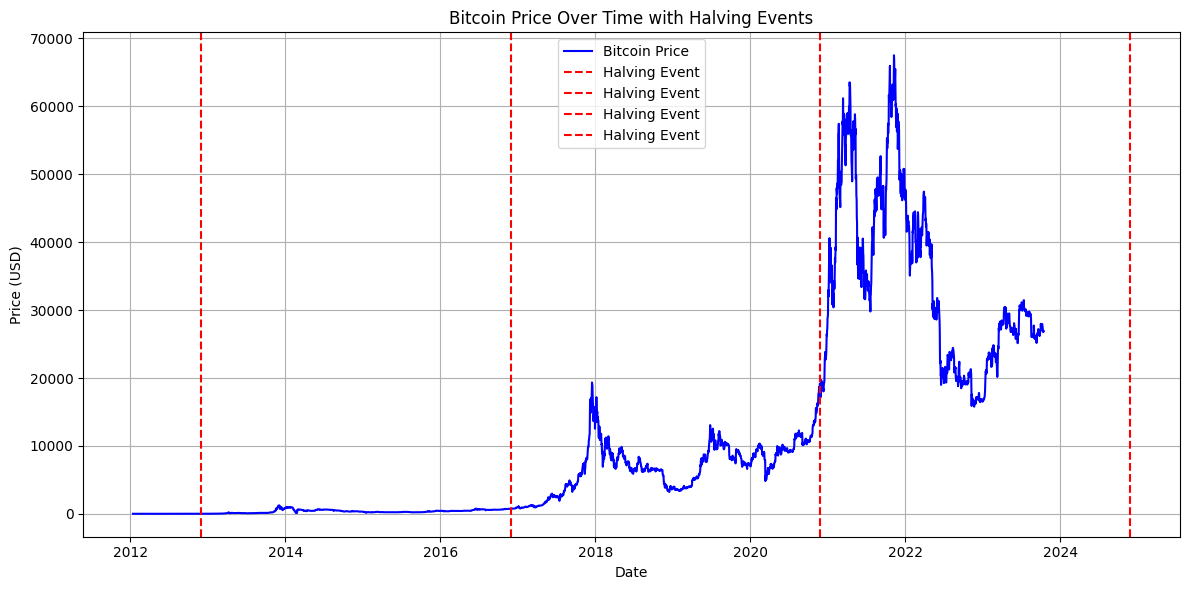

In [22]:
from datetime import datetime, timedelta


first_halving_date = datetime(2012, 11, 28)

halving_dates = [first_halving_date]

for _ in range(3):
    next_halving_date = halving_dates[-1] + timedelta(days=4 * 365)  # Approximately every four years
    halving_dates.append(next_halving_date)

plt.figure(figsize=(12, 6))
plt.plot(df_btc['Date'], df_btc['Price'], label='Bitcoin Price', color='b')
plt.title('Bitcoin Price Over Time with Halving Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

for date in halving_dates:
    plt.axvline(date, color='r', linestyle='--', label='Halving Event')

plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


# Box plot for Price Distribution

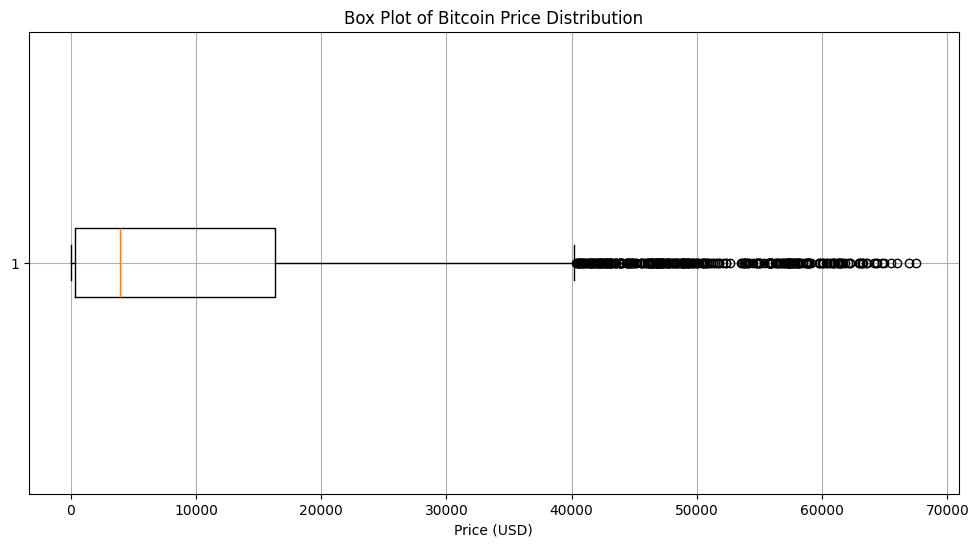

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.boxplot(df_btc['Price'], vert=False)
plt.title('Box Plot of Bitcoin Price Distribution')
plt.xlabel('Price (USD)')
plt.grid(True)

plt.show()


# Box Plot of BTC after 2020

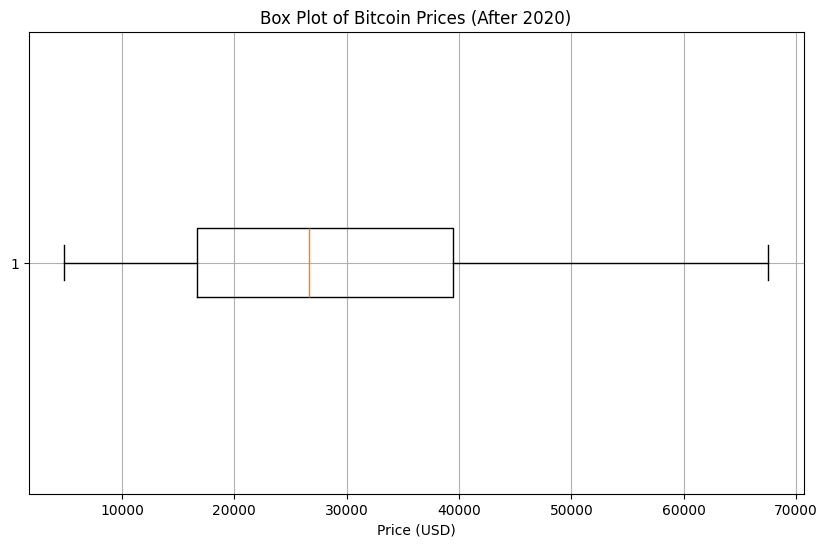

In [27]:
df_btc_after_2020 = df_btc[df_btc['Date'] >= '2020-01-01']

# Create a box plot for Bitcoin prices after 2020
plt.figure(figsize=(10, 6))
plt.boxplot(df_btc_after_2020['Price'], vert=False)
plt.title('Box Plot of Bitcoin Prices (After 2020)')
plt.xlabel('Price (USD)')
plt.grid(True)

plt.show()


# Plotting the Moving Average

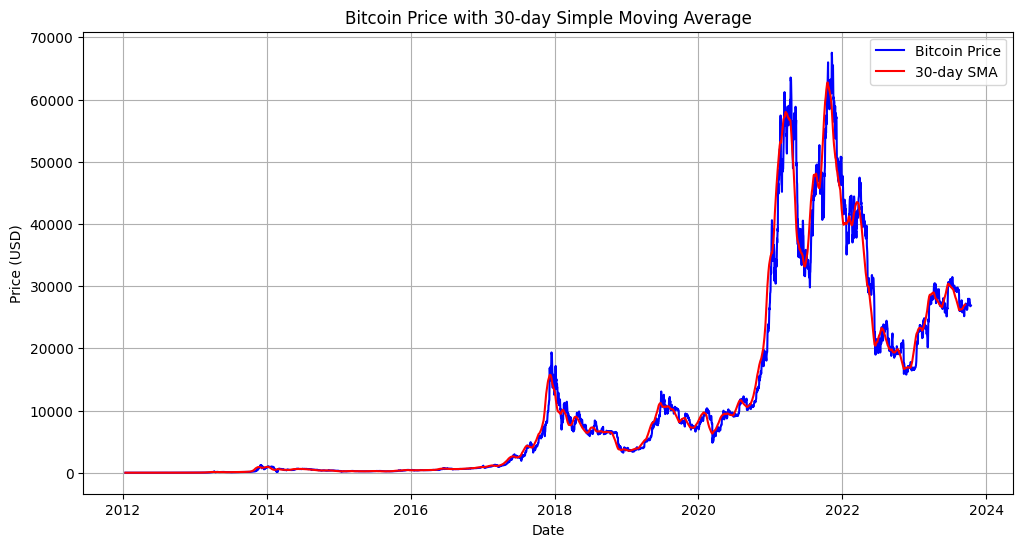

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

window = 30  # Adjust the window size as needed
df_btc['SMA'] = df_btc['Price'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_btc['Date'], df_btc['Price'], label='Bitcoin Price', color='b')
plt.plot(df_btc['Date'], df_btc['SMA'], label=f'{window}-day SMA', color='r')
plt.title(f'Bitcoin Price with {window}-day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

plt.show()

# Yearly Histogram

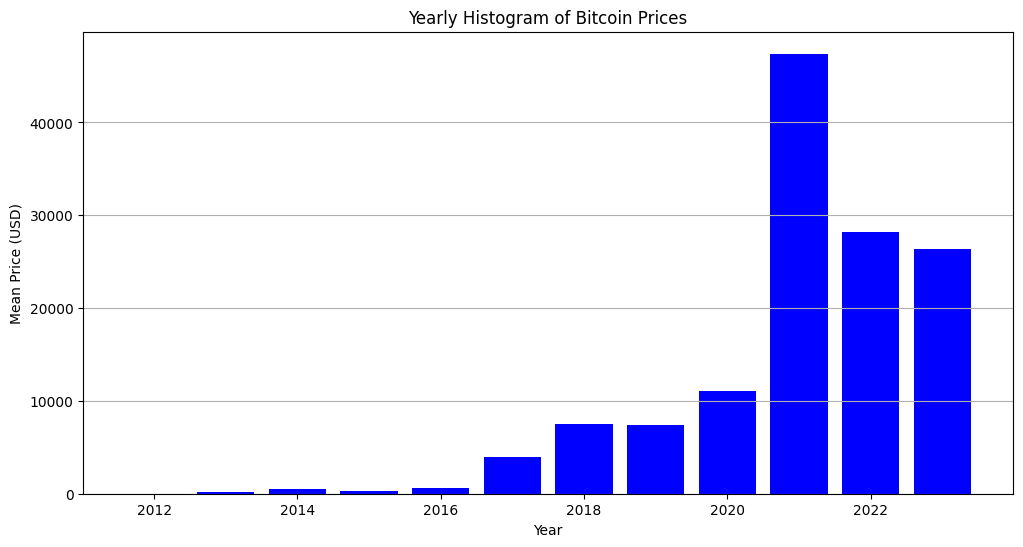

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned the data
# If not, refer to the previous messages for data cleaning steps

# Extract the year from the 'Date' column
df_btc['Year'] = df_btc['Date'].dt.year

# Group the data by year and calculate the mean price for each year
yearly_mean_prices = df_btc.groupby('Year')['Price'].mean()

# Create a yearly histogram
plt.figure(figsize=(12, 6))
plt.bar(yearly_mean_prices.index, yearly_mean_prices, color='b')
plt.title('Yearly Histogram of Bitcoin Prices')
plt.xlabel('Year')
plt.ylabel('Mean Price (USD)')
plt.grid(axis='y')

# Display the histogram
plt.show()


# Yearly Prices

In [31]:
import pandas as pd

df_btc['Year'] = df_btc['Date'].dt.year

yearly_mean_prices = df_btc.groupby('Year')['Price'].mean()

print("Yearly Mean Prices for Bitcoin:")
print(yearly_mean_prices)


Yearly Mean Prices for Bitcoin:
Year
2012        8.366856
2013      200.149041
2014      522.891233
2015      272.024110
2016      566.997814
2017     3981.072329
2018     7552.158356
2019     7371.821918
2020    11111.631148
2021    47410.840000
2022    28185.670959
2023    26400.471181
Name: Price, dtype: float64


# Highest growth year

In [33]:
import pandas as pd

df_btc['Year'] = df_btc['Date'].dt.year

annual_price_changes = df_btc.groupby('Year')['Price'].last().pct_change() * 100

year_with_highest_growth = annual_price_changes.idxmax()
highest_growth = annual_price_changes.max()

print(f"The year with the highest growth in Bitcoin prices was {year_with_highest_growth} with a growth of {highest_growth:.2f}%.")


The year with the highest growth in Bitcoin prices was 2014 with a growth of 6034.59%.


# Changing Data Format

In [50]:
import pandas as pd

df = pd.read_csv('btc_data.csv')
df['Open'] = df['Open'].apply(lambda x: float(''.join(filter(str.isdigit, str(x))) or 0))

X = df[['Open']]
y = df['Price']


In [57]:
print(X)
print(y)

          Open
0     268528.0
1     268635.0
2     267611.0
3     268782.0
4     273919.0
...        ...
4288      56.0
4289      67.0
4290      70.0
4291      68.0
4292      64.0

[4293 rows x 1 columns]
0       26,901.9
1       26,852.8
2       26,863.5
3       26,761.1
4       26,876.6
          ...   
4288         5.9
4289         5.6
4290         6.7
4291         7.0
4292         6.8
Name: Price, Length: 4293, dtype: object


Mean Squared Error: 542238.5808298052


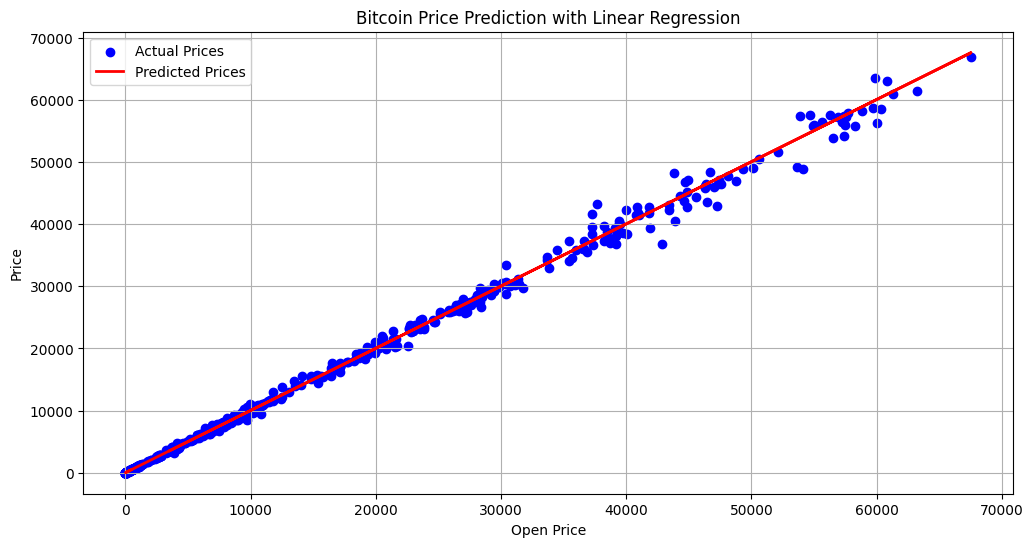

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('btc_data.csv')

df['Open'] = df['Open'].str.replace(',', '', regex=True).astype(float)
df['Price'] = df['Price'].str.replace(',', '', regex=True).astype(float)

X = df[['Open']]  
y = df['Price']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Bitcoin Price Prediction with Linear Regression')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()